# Lab_6 

In [1]:
import pandas as pd
from faker import Faker
import numpy as np

pd.set_option('display.precision', 2)

## Generate data

In [2]:
num_records = 1500
privilege_pct = 0.1


fake = Faker()
names = [fake.name() for _ in range(num_records)]

np.random.seed(123)

math_scores = np.random.normal(loc=175, scale=15, size=num_records)
english_scores = np.random.normal(loc=170, scale=20, size=num_records)
ukrainian_scores = np.random.normal(loc=170, scale=20, size=num_records)

math_scores = np.clip(math_scores, 100, 200)
english_scores = np.clip(english_scores, 100, 200)
ukrainian_scores = np.clip(ukrainian_scores, 100, 200)



privilege_flags = np.random.choice([True, False], num_records, p=[privilege_pct, 1-privilege_pct])


df = pd.DataFrame({'Name': names,
                   'Math': math_scores,
                   'English': english_scores,
                   'Ukrainian': ukrainian_scores,
                   'Privilege': privilege_flags})

In [3]:
df['Score'] = df['Math']*0.4+ df['English']*0.3 + df['Ukrainian']*0.3

In [4]:
df = df.round(2)

In [5]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
print_full(df)

                           Name    Math  English  Ukrainian  Privilege   Score
0                 Jason Goodman  158.72   200.00     160.99      False  171.78
1                 Michael Hayes  189.96   200.00     182.19      False  190.64
2             Jennifer Mitchell  179.24   159.46     193.47      False  177.58
3        Mrs. Kendra Cortez DDS  152.41   165.10     187.44      False  166.72
4                Brian Figueroa  166.32   136.71     200.00      False  167.54
5                  Logan Taylor  199.77   155.70     172.67      False  178.42
6               Samuel Anderson  138.60   140.96     195.64      False  156.42
7                  Justin Bowen  168.57   177.31     146.82      False  164.66
8                 Rebecca Bauer  193.99   156.06     187.41      False  180.64
9                   Eric Turner  162.00   147.97     165.81      False  158.93
10                 Evelyn Terry  164.82   162.89     167.07       True  164.91
11                    Joe Henry  173.58   146.30    

In [6]:
df.to_csv('resources/applicant_data.csv', index = False)

## Visualize data

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('resources/applicant_data.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       1500 non-null   object 
 1   Math       1500 non-null   float64
 2   English    1500 non-null   float64
 3   Ukrainian  1500 non-null   float64
 4   Privilege  1500 non-null   bool   
 5   Score      1500 non-null   float64
dtypes: bool(1), float64(4), object(1)
memory usage: 60.2+ KB


In [10]:
df.describe()

,Math,English,Ukrainian,Score
count,1500.00,1500.00,1500.00,1500.00
mean,174.67,169.39,170.62,171.87
std,14.13,18.83,18.52,9.66
min,126.53,100.00,105.12,136.09
25%,164.99,156.87,157.47,165.67
50%,174.94,170.42,170.81,171.95
75%,184.88,183.13,184.80,178.73
max,200.00,200.00,200.00,199.22


In [11]:
df

,Name,Math,English,Ukrainian,Privilege,Score
0,Jason Goodman,158.72,200.00,160.99,False,171.78
1,Michael Hayes,189.96,200.00,182.19,False,190.64
2,Jennifer Mitchell,179.24,159.46,193.47,False,177.58
3,Mrs. Kendra Cortez DDS,152.41,165.10,187.44,False,166.72
4,Brian Figueroa,166.32,136.71,200.00,False,167.54
...,...,...,...,...,...,...
1495,Gregory Johnson,178.24,168.49,184.40,False,177.16
1496,Mitchell Crawford,153.40,151.08,146.81,True,150.73
1497,Victoria Baker,174.37,200.00,182.19,False,184.41
1498,Brandon Valdez,182.29,190.32,131.61,False,169.49


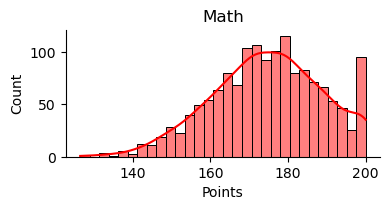

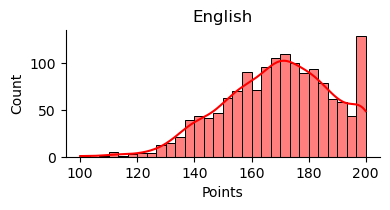

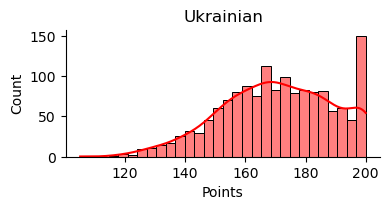

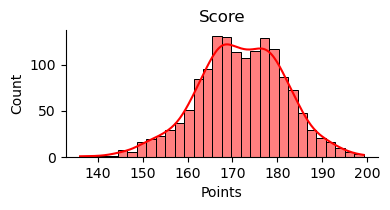

In [12]:
for col in df.drop(['Name', 'Privilege'],axis=1).columns:
    sns.displot(df[col], bins=30, kde=True, color='red', height=2, aspect=2).set(xlabel='Points',title=col)

# Add target column

In [13]:
def isAccepted(math, english, ukr, score, hasPrivilege=False):
    if hasPrivilege:
        if score < 144 or math < 120 or english < 120 or ukr < 120:
            return False
    else:
        if score < 160 or math < 140:
            return False
    return True

In [14]:
def addIsAccepted(df):
    acceptLimit = 350
    
    privilegeCount = 0
    privilegeLimit = acceptLimit * 0.1
    
    privileged = df[df['Privilege'] == True].sort_values(by = ['Score'], ascending=False)
    
    isAcceptedList = []
    for index, row in privileged.iterrows():
        if privilegeCount < privilegeLimit:
            res = isAccepted(row['Math'],
                       row['English'],
                       row['Ukrainian'],
                       row['Score'],
                       row['Privilege'])
            if res:
                privilegeCount += 1
                isAcceptedList.append(True)
                continue
        isAcceptedList.append(False)
    privileged['isAccepted'] = isAcceptedList
    
    otherApplicants = pd.concat([privileged[privileged['isAccepted'] == False], df[df['Privilege'] == False]])
    
    otherApplicants = otherApplicants.sort_values(by = ['Score'], ascending=False)
    
    acceptedCount = privilegeCount
    isAcceptedList = []
    for index, row in otherApplicants.iterrows():
        if acceptedCount < acceptLimit:
            res = isAccepted(row['Math'],
                       row['English'],
                       row['Ukrainian'],
                       row['Score'],
                       row['Privilege'])
            if res:
                acceptedCount += 1
                isAcceptedList.append(True)
                continue
        isAcceptedList.append(False)
    otherApplicants['isAccepted'] = isAcceptedList
    
    res_df = pd.concat([privileged[privileged['isAccepted'] == True], 
                       otherApplicants])
    return res_df.reset_index(drop=True)
    
df = addIsAccepted(df)

print_full(df.drop('Name', axis=1))

        Math  English  Ukrainian  Privilege   Score  isAccepted
0     200.00   179.07     191.16       True  191.07        True
1     197.37   176.18     189.37       True  188.61        True
2     184.17   180.92     200.00       True  187.94        True
3     168.95   200.00     200.00       True  187.58        True
4     195.62   168.64     193.16       True  186.79        True
5     185.37   176.07     198.55       True  186.53        True
6     191.34   168.06     195.22       True  185.52        True
7     169.04   189.71     200.00       True  184.53        True
8     200.00   200.00     146.89       True  184.07        True
9     171.64   185.48     197.14       True  183.44        True
10    173.11   200.00     180.33       True  183.34        True
11    178.72   200.00     172.61       True  183.27        True
12    175.35   200.00     177.06       True  183.26        True
13    176.86   180.73     193.83       True  183.11        True
14    179.27   172.81     197.94       T

In [15]:
df.to_csv('marked_data.csv', index = False)

# Building a model

## Preprocess Data

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [17]:
df = df.drop('Name', axis = 1)

In [18]:
scaler = MinMaxScaler()

X = scaler.fit_transform(df.drop('isAccepted', axis=1))
y = df['isAccepted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import load_model

In [25]:
def select_model(layers, activation):
    model = Sequential()
    model.add(Dense(layers[0], input_dim=X_train.shape[1], activation=activation))
    for i, node in enumerate(layers[1:]):
        model.add(Dense(node, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [21]:
# model = KerasClassifier(select_model, verbose=1)

In [22]:
# layers = [[15], [30, 15], [30, 15, 5], [45, 30, 15, 5]]
# activations = ['tanh','relu']

# grid = GridSearchCV(estimator = model, param_grid = dict(layers = layers,
#                                                      activation = activations, 
#                                                     batch_size = [64],
#                                                     epochs=[30]))

# grid_res = grid.fit(X_train, y_train)

In [23]:
# [grid_res.best_score_, grid_res.best_params_]

## Building model with best params

In [26]:
# model = select_model([45, 30, 15, 5], 'tanh')

In [27]:
# model.fit(X_train, y_train,batch_size=64, epochs= 100)

Epoch 1/100
19/19 [==============================] - 1s 2ms/step - loss: 0.5937 - accuracy: 0.7625
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7625
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5318 - accuracy: 0.7625
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.7625
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7625
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.7633
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.7867
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8683
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.9175
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.9392
Epoch 11/

19/19 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9900
Epoch 84/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9900
Epoch 85/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9908
Epoch 86/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9900
Epoch 87/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9900
Epoch 88/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9967
Epoch 89/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.9850
Epoch 90/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9867
Epoch 91/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9933
Epoch 92/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9908
Epoch 93/100


In [28]:
# model.save('applications_classify.md5')

INFO:tensorflow:Assets written to: applications_classify.md5\assets


In [29]:
# predictions = model.predict(X_test)
# predictions = (predictions > 0.5)

10/10 [==============================] - 0s 1ms/step


In [30]:
# print(classification_report(y_test.values, predictions))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       235
        True       1.00      0.92      0.96        65

    accuracy                           0.98       300
   macro avg       0.99      0.96      0.97       300
weighted avg       0.98      0.98      0.98       300



## Save results to excel

In [31]:
df = pd.read_csv('marked_data.csv').drop('isAccepted', axis = 1)

In [32]:
scaler = MinMaxScaler()

res_df = scaler.fit_transform(df.drop('Name', axis = 1))

res_df

array([[1.        , 0.7907    , 0.90682968, 1.        , 0.87090131],
       [0.96420308, 0.7618    , 0.88796374, 1.        , 0.8319341 ],
       [0.78453791, 0.8092    , 1.        , 1.        , 0.82132108],
       ...,
       [0.27412549, 0.3685    , 0.39154722, 0.        , 0.09995248],
       [0.41799374, 0.1724    , 0.36161467, 0.        , 0.06035166],
       [0.09201034, 0.2297    , 0.50389966, 0.        , 0.        ]])

In [33]:
model = load_model('applications_classify.md5')

In [34]:
df['Accepted'] = model.predict(res_df) > 0.5

47/47 [==============================] - 0s 1ms/step


In [35]:
df.to_excel('result.xlsx', index = False)

# Visualize

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Accepted', data=df)
plt.title('Rejected vs Accepted Students')
plt.xlabel('Accepted')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Score', kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sns.pairplot(df, vars=['Math', 'English', 'Ukrainian', 'Score'], hue='Accepted')

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='Math', y='English', z='Ukrainian', color='Accepted', hover_data=['Name'])
fig.update_traces(marker_size = 5)
fig.show()
